In [1]:
import numpy as np
from bridson import poisson_disc_samples
import matplotlib.pyplot as plt

In [2]:
pos = poisson_disc_samples(width=11, height=5, r=0.1)
pois = np.array(pos) # create some random points 
xx = pois[:, 0] + 10 # adding some offset
yy = pois[:, 1] + 10

In [3]:
zz = np.zeros(len(xx))
def z_idl(x, z):          # ideal/mathematical elevation function
    mx = int(x.mean())
    z[x<mx] = 3.3
    z[x>mx] = 4.75
    return(z)

In [4]:
nz = z_idl(xx, zz)
pts = np.c_[pois, nz]

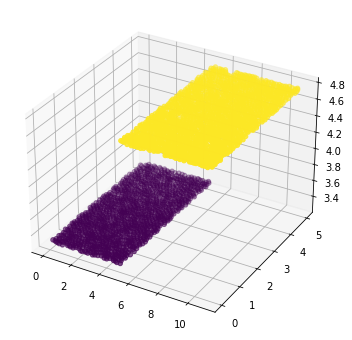

In [5]:
fg = plt.figure(1, (8, 6))
ax = fg.add_subplot(111, projection = '3d')
im = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c = pts[:,2])

In [6]:
def normal(x,mu,sigma): # Gaussian function
    return ( 2.*np.pi*sigma**2. )**-.5 * np.exp( -.5 * (x-mu)**2. / sigma**2. )

def sint(pts, noisx, pls_len, noisy = False): # synthetic full waveform (with 2 dif. std) with noise options
    if noisy == True:
        ml = 1
    else:
        ml = 0
    beam = np.zeros((pls_len, 5))
    beam[:, 2] = (np.arange(0, pls_len)*0.15)-3.3
    beam[:, 2] -= np.median(beam[:pls_len, 2])
    pnts = np.zeros((pts.shape[0]*beam.shape[0], 5))
    for i in range(pts.shape[0]):
        no1 = normal(beam[:, 2]+noisx[i], 0, 0.85)
        rn1 = np.random.random(pls_len)*no1.mean()/5
        no1 += rn1 * ml
        no2 = normal(beam[:, 2]+noisx[i], 0, 1.2)
        rn2 = np.random.random(pls_len)*no2.mean()/5
        no2 += rn2 * ml
        pnts[i*pls_len:(i+1)*pls_len, :] = beam + np.array([pts[i, 0], pts[i, 1], pts[i, 2], 0, 0])
        if pts[i, 2]>4:
            pnts[i*pls_len:(i+1)*pls_len, 3:] = np.c_[no1, np.gradient(no1)] # adding also gradient of amplitude
        else:
            pnts[i*pls_len:(i+1)*pls_len, 3:] = np.c_[no2, np.gradient(no2)]

    ar = np.zeros((int(len(pnts)/pls_len), pls_len, int(pnts.shape[1])))
    for i in range(int(pnts.shape[0]/pls_len)):
        ar[i] = pnts[i*pls_len:(i+1)*pls_len, :]
    return(ar)

def thr(pnts): # thresholding / cutting the tails
    thr_ = []
    for i in range(len(pnts)):
        thr_.append(pnts[i][pnts[i, :, 3]>0.15])
    thr_ = np.array(thr_, dtype = object)
    return(thr_)

In [7]:
xno = np.random.random(xx.shape)*0.5 - 0.25 # creating timing error

In [8]:
dnn = sint(pts, np.zeros(len(pts)), 45) # no noise
dxn = sint(pts, xno, 45)                # timing error
dyn = sint(pts, np.zeros(len(pts)), 45, noisy = True) # amplitude noise
dbt = sint(pts, xno, 45, noisy = True) # both noises

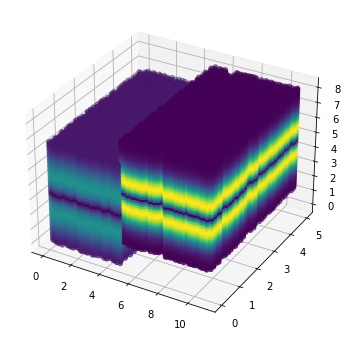

In [9]:
# visualization (color is the gradient)
fg = plt.figure(1, (8, 6))
ax = fg.add_subplot(111, projection = '3d')
im = ax.scatter(np.vstack(dnn)[:,0], np.vstack(dnn)[:,1], np.vstack(dnn)[:,2], c = np.abs(np.vstack(dnn)[:,4]))

Text(0.5, 0.98, 'All Cases (single pulse example)')

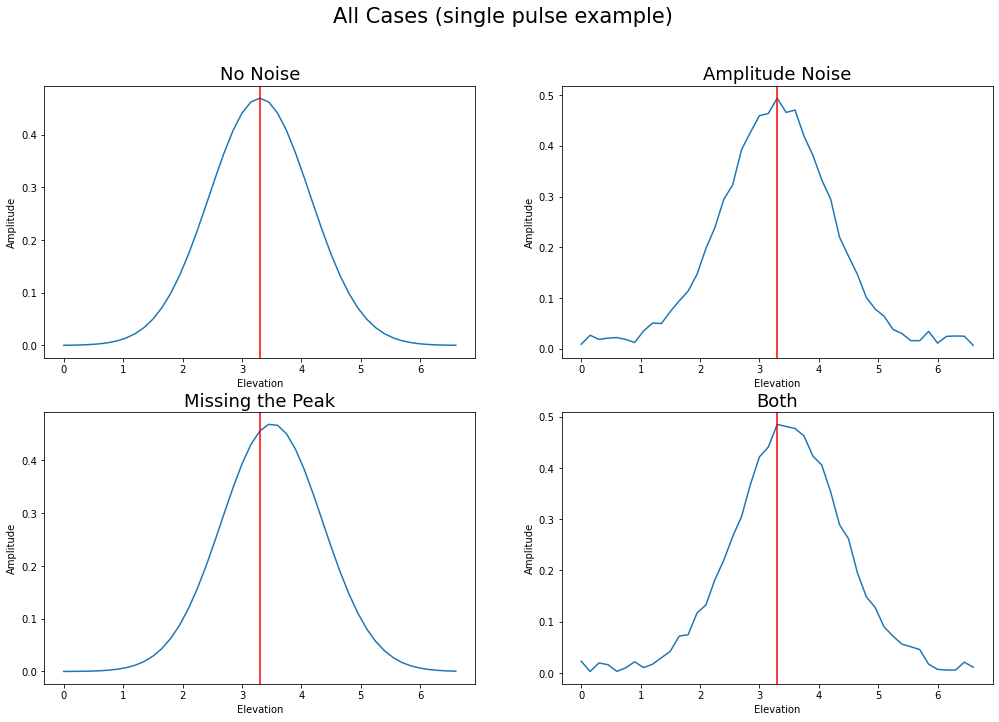

In [10]:
x__ = np.arange(0, 45)*0.15
fig, ax = plt.subplots(2, 2, figsize = (17, 11))
ax[0, 0].plot(x__, dnn[23, :, 3])
ax[0, 0].axvline(3.3, color = 'r')
ax[0, 0].set_title('No Noise', fontsize=18)
ax[0, 0].set_xlabel('Elevation')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 1].plot(x__, dyn[23, :, 3])
ax[0, 1].axvline(3.3, color = 'r')
ax[0, 1].set_title('Amplitude Noise', fontsize=18)
ax[0, 1].set_xlabel('Elevation')
ax[0, 1].set_ylabel('Amplitude')
ax[1, 0].plot(x__, dxn[23, :, 3])
ax[1, 0].axvline(3.3, color = 'r')
ax[1, 0].set_title('Missing the Peak', fontsize=18)
ax[1, 0].set_xlabel('Elevation')
ax[1, 0].set_ylabel('Amplitude')
ax[1, 1].plot(x__, dbt[23, :, 3])
ax[1, 1].axvline(3.3, color = 'r')
ax[1, 1].set_title('Both', fontsize=18)
ax[1, 1].set_xlabel('Elevation')
ax[1, 1].set_ylabel('Amplitude')
fig.suptitle('All Cases (single pulse example)', fontsize=21) 